In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
def load_datasets(filename, column_list, target_column):
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [99]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [100]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [101]:
def normalize(X, mean = None, std = None):
    if not mean:
        mean = np.mean(X, axis=0)
    if not std:
        std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [102]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [103]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    h_thetha = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h_thetha - y))
    
    return J

In [104]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J=True):
    m = X.shape[0]
    J_history = []
    
    for i in range(num_iters):
        h_thetha = np.dot(X, theta)
        error = h_thetha - y
        delta = (alpha / m) * np.dot(X.T, error)
        theta = theta.astype(float) - delta 
        
        J = cost_function(X, y, theta)
        J_history.append(J)
        
        if print_J:
            print(f"Iteration {i + 1}, J = {J}")
        
    return theta, J_history


In [105]:
def plot_J(X, y):
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Using add_subplot instead of gca
    theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
    ax.plot_surface(theta_0, theta_1, J_vals, cmap='viridis')
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_zlabel('Cost')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [106]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
    return h_thetha

In [107]:
X, y = load_datasets('burrito.csv', ["A"], "B")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


In [108]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


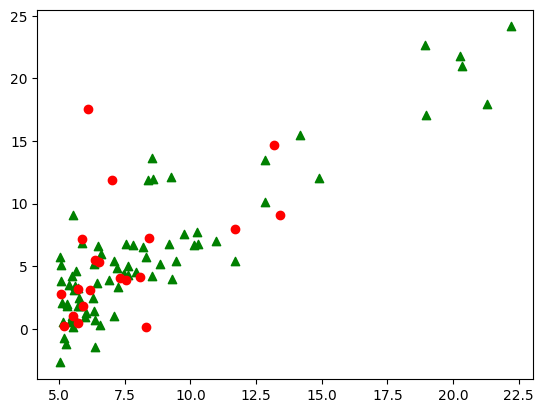

In [109]:
plot_data(X_train, X_test, y_train, y_test)

In [110]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [111]:
y = y_train[:]

In [112]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
33.54915334279091


In [113]:
alpha = 0.01
num_iters = 1500

In [114]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.910276505332615; Theta 1: 5.054945595807166


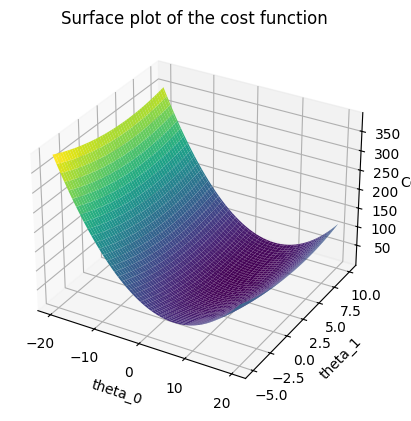

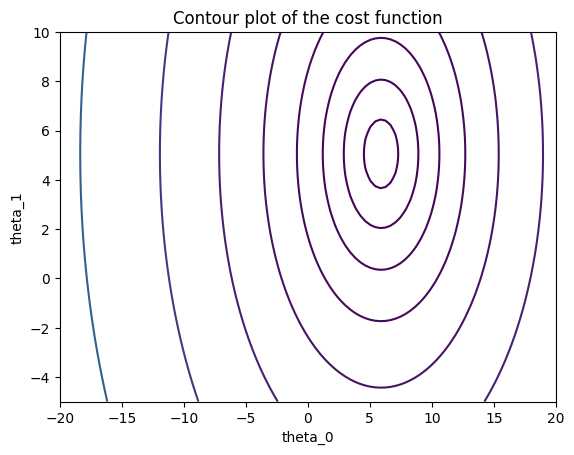

In [115]:
plot_J(X, y)

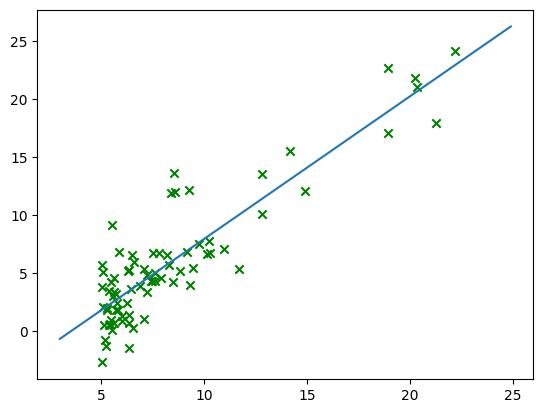

In [116]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train[:, 0], y_train, marker='x', c='green')

plt.show()

In [117]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test - mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test.flatten(), 'y_actual' : y_test.flatten(), 'y_pred' : y_test_pred.flatten(), 'err' : rel_diff})

print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred          err
0    6.1101  17.59200   3.170217    81.979210
1    6.1891   3.13860   3.267182     4.096798
2    7.3345   4.02590   4.673048    16.074612
3    5.7340   3.15510   2.708592    14.151955
4   13.1760  14.69200  11.842914    19.392092
5    8.4084   7.22580   5.991154    17.086630
6    5.1884   0.20421   2.038921   898.443460
7    5.7292   0.47953   2.702700   463.614400
8    8.2934   0.14454   5.850003  3947.324699
9    7.5386   3.88450   4.923560    26.748885
10   5.8707   7.20290   2.876377    60.066398
11   8.0959   4.11640   5.607591    36.225618
12   5.0594   2.82140   1.880587    33.345623
13   6.5159   5.34360   3.668297    31.351581
14  11.7000   8.00430  10.031269    25.323503
15  13.3940   9.05510  12.110487    33.742171
16   7.0032  11.85400   4.266410    64.008692
17   6.3534   5.49740   3.468844    36.900277
18   5.8918   1.84950   2.902276    56.922175
19   5.5416   1.01790   2.472440   142.896120
9.079839240140213
